### MINIMAL EXAMPLE OF JUPYTER NOTEBOOK WHICH CAN BE RUN WITH CROMWELL

### IMPORT NECESSARY MODULES

In [2]:
%load_ext autoreload
%autoreload 2

In [23]:
from IPython.display import Image, display, HTML, IFrame
from pathlib import Path
from glob import glob

In [24]:
dir1 = "/Users/ldalessi/cromwell_for_ML/RESULTS/"
dir2 = "/Users/ldalessi/cromwell_for_ML/RESULTS2/"

In [42]:
files1 = glob(dir1+"*.png")
files2 = glob(dir2+"*.png") # grab only files name not absolute path
s1 = set(files1)
s2 = set(files2)
common = s1 & s2

In [43]:
print(common)

set()


In [41]:
print(set(files1))
print(set(files2))

s & t

{'/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_train.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_reference.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0005_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_reconstruction.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0010_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_kl_trajectory.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0000_rec.png'}
{'/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_train.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_kl_trajectory.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_reference.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_0005_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_reconstruction.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_0010_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS2/trial_v1_0000_rec.png'}


In [40]:
common_files = 
.intersection(set(files2))
print(common_files)

#s.symmetric_difference(t)


set()


In [21]:
! ls Path(dir1)

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: ` ls Path(dir1)'


In [9]:
! ls /Users/ldalessi/cromwell_for_ML/RESULTS/


input_params.json           trial_v1_history_0.pkl
trial_v1.log                trial_v1_history_10.pkl
trial_v1_0000_rec.png       trial_v1_history_5.pkl
trial_v1_0005_rec.png       trial_v1_kl_trajectory.png
trial_v1_0010_rec.png       trial_v1_movie_rec.gif
trial_v1_ckp_0.pkl          trial_v1_reconstruction.png
trial_v1_ckp_10.pkl         trial_v1_reference.png
trial_v1_ckp_5.pkl          trial_v1_train.png


In [ ]:


HTML("<img src="+movie_rec_file_local+"></img>")

In [ ]:
<div class="row">
  <div class="column">
    <img src="wedding.jpg">
    <img src="rocks.jpg">
    <img src="falls2.jpg">
    <img src="paris.jpg">
    <img src="nature.jpg">
    <img src="mist.jpg">
    <img src="paris.jpg">
  </div>
  <div class="column">
    <img src="underwater.jpg">
    <img src="ocean.jpg">
    <img src="wedding.jpg">
    <img src="mountainskies.jpg">
    <img src="rocks.jpg">
    <img src="underwater.jpg">
  </div>
  <div class="column">
    <img src="wedding.jpg">
    <img src="rocks.jpg">
    <img src="falls2.jpg">
    <img src="paris.jpg">
    <img src="nature.jpg">
    <img src="mist.jpg">
    <img src="paris.jpg">
  </div>
  <div class="column">
    <img src="underwater.jpg">
    <img src="ocean.jpg">
    <img src="wedding.jpg">
    <img src="mountainskies.jpg">
    <img src="rocks.jpg">
    <img src="underwater.jpg">
  </div>
</div>

In [2]:
import os
import logging
import sys
from datetime import datetime

#os.environ['CUDA_LAUNCH_BLOCKING'] = "1" #for debugging, it decrease performance dramatically

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from utilities import *
from model import * 

#!pip install moviepy
import moviepy.editor as mpy
import numpy as np
import torch
import pyro

# Set up pyro environment
pyro.clear_param_store()
pyro.set_rng_seed(0)

# Check versions
print("pyro.__version__  --> ",pyro.__version__)
print("torch.__version__ --> ",torch.__version__)
assert(pyro.__version__.startswith('0.4'))
assert(torch.__version__.startswith('1.2'))

pyro.__version__  -->  0.4.0
torch.__version__ -->  1.2.0


### read jason file

In [4]:
params = load_json_as_dict("./input_params.json")  
print(params)

{'cloud': {'__comment': 'cloud parameters', 'VM_image': 'us.gcr.io/broad-dsde-methods/pyro@sha256:4c4745a22762852cf14263c537f645182df3557a1163527a3aaeca7e5da37b4225', 'GPU_type': 'tesla_k80', 'bucket_with_data': 'ld-data-bucket', 'bucket_with_results': 'ld-results-bucket', 'train_dataset': 'fashionmnist_train', 'test_dataset': 'fashionmnist_test'}, 'simulation': {'__comment': 'there are 3 types of runs: scratch resume pretrain', 'name': 'trial_v1', 'type': 'scratch', 'path_to_file': None}, 'architecture': {'__comment': 'parameters specifying the architecture of the model', 'dim_zwhat': 25, 'width_input_image': 28, 'ch_input_image': 1}, 'loss': {'__comment': 'parameter of the observation model', 'mse_sigma': 0.1}, 'optimizer': {'__comment': 'which optimizer to use', 'type': 'adam', 'lr': 0.001, 'betas': [0.9, 0.999], 'eps': 1e-08}, 'training': {'__comment': 'parameter of the observation model', 'EPOCHS': 11, 'TEST_FREQUENCY': 5, 'CHECKPOINT_FREQUENCY': 20, 'batch_size': 64, 'scheduler_i

### prepare the file names

In [5]:
local_machine = True
if local_machine:
    
    base_name = params["simulation"]["name"]
    
    output_dir = "/Users/ldalessi/cromwell_for_ML/RESULTS/"
    input_dir = "/Users/ldalessi/cromwell_for_ML/DATA/"
    
    train_file = os.path.join(input_dir, str(params["cloud"]["train_dataset"])+".pkl")
    test_file = os.path.join(input_dir, str(params["cloud"]["test_dataset"])+".pkl")
    json_param_file = os.path.join(output_dir, "input_params.json")
    log_file = os.path.join(output_dir, str(params["simulation"]["name"]) + ".log")
    
else:
    # this is when you use google VM. 
    # In this case you need to mount the google buckets and get a path to those
    raise Exception

### start logging some data

In [6]:
logging.basicConfig(level=logging.INFO,
                    format="luca_logging: %(message)s",
                    filename=log_file,
                    filemode="w")
console = logging.StreamHandler()
formatter = logging.Formatter("luca_logging: %(message)s")
console.setFormatter(formatter)  # Use the same format for stdout.
logging.getLogger('').addHandler(console)  # Log to stdout and a file.

# Log the start time.
logging.info(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

luca_logging: 2020-02-26 14:17:10


In [7]:
logging.info("saving input json in output directory")
save_dict_as_json(params,output_dir+"input_params.json")

luca_logging: saving input json in output directory


### get the data

In [8]:
logging.info("get the data")
train_dataset = DatasetInMemory(train_file,use_cuda=torch.cuda.is_available())
test_dataset  = DatasetInMemory(test_file,use_cuda=torch.cuda.is_available())

luca_logging: get the data


Dataset lenght: 2000
imgs.shape torch.Size([8, 1, 28, 28])
type(imgs) <class 'torch.Tensor'>
imgs.device cpu
torch.max(imgs) tensor(1.)
torch.min(imgs) tensor(0.)


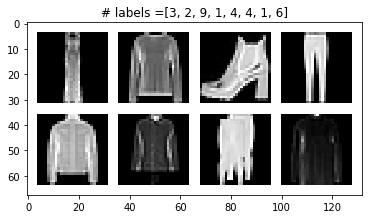

In [9]:
train_dataset.check()

Dataset lenght: 500
imgs.shape torch.Size([8, 1, 28, 28])
type(imgs) <class 'torch.Tensor'>
imgs.device cpu
torch.max(imgs) tensor(1.)
torch.min(imgs) tensor(0.)


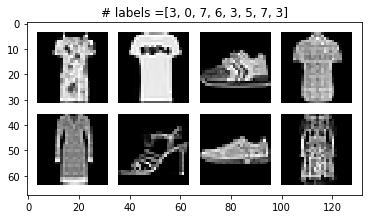

In [10]:
test_dataset.check()

### Instantiate model and optimizer

In [11]:
logging.info("Instantiate model and optimizer")
vae = VaeClass(params)
optimizer = instantiate_optimizer(vae, params)

luca_logging: Instantiate model and optimizer


### There are 3 possible simulation types: scratch, resumed, pretrained

In [12]:
logging.info("simulation type = "+str(params["simulation"]["type"]))

if (params["simulation"]["type"] == "scratch"):
    
    epoch_restart = -1
    history_dict = {}
    min_test_loss = 99999999

elif (params["simulation"]["type"] == "resumed"):
        
    resumed = load_info(path=params["simulation"]["path_to_file"], 
                        load_epoch=True, 
                        load_history=True)
    epoch_restart = resumed.epoch
    history_dict = resumed.history_dict
    min_test_loss = min(history_dict["test_loss"])
    
    load_model_optimizer(path=params["simulation"]["path_to_file"], 
                         model=vae,
                         optimizer=optimizer)

elif (params["simulation"]["type"] == "pretrained"):
       
    epoch_restart = -1
    history_dict = {}
    min_test_loss = 99999999
    
    load_model_optimizer(path=params["simulation"]["path_to_file"], 
                         model=vae,
                         optimizer=None)
    
# instantiate the scheduler if necessary    
if params["training"]["scheduler_is_active"]:
    scheduler = instantiate_scheduler(optimizer, params)

luca_logging: simulation type = scratch


### Train loop

In [28]:
TEST_FREQUENCY = params["training"]["TEST_FREQUENCY"]
CHECKPOINT_FREQUENCY = params["training"]["CHECKPOINT_FREQUENCY"]
NUM_EPOCHS = params["training"]["EPOCHS"]
BATCH_SIZE = params["training"]["batch_size"]

logging.info("start training -> "+datetime.now().strftime('%Y-%m-%d %H:%M:%S')) 
try:
    for delta_epoch in range(1,NUM_EPOCHS+1):
        epoch = delta_epoch+epoch_restart
        vae.train()   
        
        #with torch.autograd.set_detect_anomaly(True):
        with torch.autograd.set_detect_anomaly(False):
            train_metrics = train_one_epoch(vae, 
                                            train_dataset, 
                                            optimizer, 
                                            BATCH_SIZE, 
                                            verbose=False, 
                                            weight_clipper=None)
            s = pretty_print_metrics(epoch, train_metrics, is_train=True)
            logging.info(s)
                
            
            history_dict = add_named_tuple_to_dictionary(namedtuple=train_metrics, 
                                                         dictionary=history_dict,
                                                         key_prefix="train_")
            
        if params["training"]["scheduler_is_active"]:
            scheduler.step(epoch=epoch)
        
        if(epoch % TEST_FREQUENCY == 0):
            vae.eval()
            test_metrics = train_one_epoch(vae, 
                                           test_dataset, 
                                           optimizer, 
                                           BATCH_SIZE, 
                                           verbose=False, 
                                           weight_clipper=None)
            
            s = pretty_print_metrics(epoch, test_metrics, is_train=False)
            logging.info(s)
                    
            history_dict = add_named_tuple_to_dictionary(namedtuple=test_metrics, 
                                                         dictionary=history_dict,
                                                         key_prefix="test_")
            
            test_loss = test_metrics["loss"]
            min_test_loss = min(min_test_loss, test_loss)
                
            #if((test_loss == min_test_loss) or ((epoch % CHECKPOINT_FREQUENCY) == 0)): 
            if((test_loss == min_test_loss) or ((epoch % TEST_FREQUENCY) == 0)):
                checkpoint_file = os.path.join(output_dir, base_name+"_ckp_"+str(epoch)+".pkl")
                history_file = os.path.join(output_dir, base_name+"_history_"+str(epoch)+".pkl")
                
                save_everything(model=vae, 
                                optimizer=optimizer, 
                                history_dict=history_dict, 
                                epoch=epoch, 
                                params_dict=params, 
                                path=checkpoint_file)
                
                save_dict_as_json(history_dict, path=history_file)
                logging.info("saved files -> "+checkpoint_file+"  "+history_file)
                
    logging.info("end training -> "+datetime.now().strftime('%Y-%m-%d %H:%M:%S')) 

except KeyboardInterrupt:
    logging.info("Keyboard interrupt.  Terminated without saving.\n")

luca_logging: start training -> 2020-02-26 14:25:54
luca_logging: Train [epoch    0] loss=3.109162, kl=0.674955, nll=2.434207
luca_logging: Test  [epoch    0] loss=3.069086, kl=0.662487, nll=2.406599
luca_logging: saved files -> /Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_ckp_0.pkl  /Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_history_0.pkl
luca_logging: Train [epoch    1] loss=3.072355, kl=0.674536, nll=2.397819
luca_logging: Train [epoch    2] loss=2.991305, kl=0.670111, nll=2.321194
luca_logging: Train [epoch    3] loss=2.963506, kl=0.671114, nll=2.292392
luca_logging: Train [epoch    4] loss=2.908551, kl=0.672146, nll=2.236406
luca_logging: Train [epoch    5] loss=2.881925, kl=0.663698, nll=2.218228
luca_logging: Test  [epoch    5] loss=2.904815, kl=0.680159, nll=2.224656
luca_logging: saved files -> /Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_ckp_5.pkl  /Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_history_5.pkl
luca_logging: Train [epoch    6] loss=2.854704, kl=0

# Check the results

In [14]:
history_dict.keys()

dict_keys(['train_loss', 'train_kl', 'train_nll', 'test_loss', 'test_kl', 'test_nll'])

In [15]:
for k,v in history_dict.items():
    print(k," -->", history_dict[k][-3:])

train_loss  --> [3.357602470397949, 3.2631056270599363, 3.2007859954833986]
train_kl  --> [0.6795844073295594, 0.676542576789856, 0.6702652792930603]
train_nll  --> [2.678018049240112, 2.586563066482544, 2.5305207500457763]
test_loss  --> [7.253728515625, 3.6229485778808592, 3.1419517517089846]
test_kl  --> [0.424997802734375, 0.7003960494995117, 0.6584096908569336]
test_nll  --> [6.828730529785156, 2.922552520751953, 2.4835419921875]


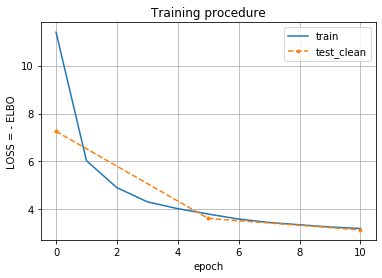

In [16]:
#plt.yscale('log')
y_shift=0
x_shift=0
sign=1
plt.plot(np.arange(x_shift, x_shift+len(history_dict["train_loss"])), sign*np.array(history_dict["train_loss"])+y_shift,'-')
plt.plot(np.arange(x_shift, x_shift+len(history_dict["test_loss"])*TEST_FREQUENCY,TEST_FREQUENCY), sign*np.array(history_dict["test_loss"])+y_shift, '.--')
plt.xlabel('epoch')
plt.ylabel('LOSS = - ELBO')
plt.title('Training procedure')
#plt.ylim(ymax=2)
plt.grid(True)
plt.legend(['train', 'test_clean', 'test_noisy'])
#plt.show()

tmp_file = os.path.join(output_dir, base_name+"_train.png")
plt.savefig(tmp_file)

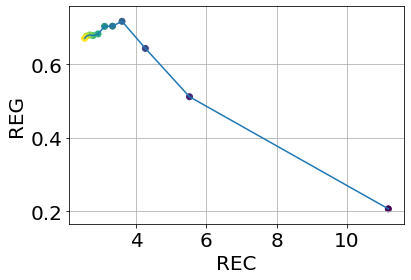

In [17]:
# Plot of KL vs evidence
fontsize=20
labelsize=20

how_many = 2000
scale= 1
N = len(history_dict["train_kl"][-how_many :])
colors = np.arange(0.0,N,1.0)/N

#plt.yscale('log')
#plt.xlim(xmin=1.0, xmax=1.5)
plt.xlabel('REC',fontsize=fontsize)
plt.ylabel('REG',fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=labelsize)
plt.scatter(history_dict["train_nll"][-how_many :], history_dict["train_kl"][-how_many :],c=colors)
plt.plot(history_dict["train_nll"][-how_many :], history_dict["train_kl"][-how_many :], '-')
plt.grid()
#plt.xlim(xmax=2.5)


tmp_file = os.path.join(output_dir, base_name+"_kl_trajectory.png")
plt.savefig(tmp_file) 

### Check reconstruction

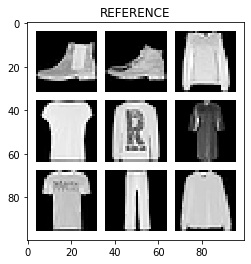

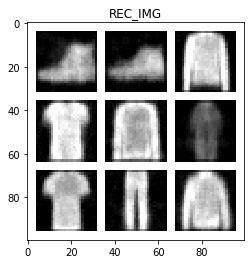

In [18]:
tmp_list = [291, 413, 133, 148, 1,2,3,4,5,6,7,8,9]
reference_imgs, labels=test_dataset.load(batch_size=9, indices=tmp_list)
metric, inference = vae.reconstruct_img(reference_imgs)

reconstruction_file = os.path.join(output_dir, base_name+"_reconstruction.png")
reference_file = os.path.join(output_dir, base_name+"_reference.png")

imgs_ref = show_batch(reference_imgs[:],n_col=3,n_padding=4,title="REFERENCE")
imgs_ref.savefig(reference_file)

imgs_rec = show_batch(inference.reconstruction, n_col=3,n_padding=4, title="REC_IMG")
imgs_rec.savefig(reconstruction_file)

display(imgs_ref, imgs_rec)

# MAKE MOVIE

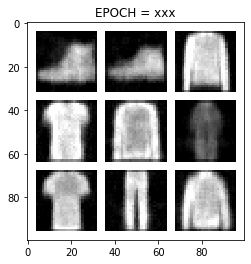

In [19]:
epoch="xxx"
tmp = show_batch(inference.reconstruction[:9],n_col=3,n_padding=4,title="EPOCH = "+str(epoch))
display(tmp)

# actual loop

In [20]:
rec_filenames = []

for epoch in range(0,30,TEST_FREQUENCY):
    if(epoch<10):
        label ="_000"+str(epoch)
    elif(epoch<100):
        label = "_00"+str(epoch)
    elif(epoch<1000):
        label = "_0"+str(epoch)
    elif(epoch<10000):
        label = "_"+str(epoch)
    else:
        raise Exception
    
    try:
        checkpoint_file = os.path.join(output_dir, base_name+"_ckp_"+str(epoch)+".pkl")
        _ = load_model_optimizer(path=checkpoint_file, model=vae, optimizer=None)
        metric, inference = vae.reconstruct_img(reference_imgs)
        tmp_fig = show_batch(inference.reconstruction[:8],n_col=4,n_padding=4,title="EPOCH = "+str(epoch))
        tmp_rec_file = os.path.join(output_dir, base_name+label+"_rec.png")
        rec_filenames.append(tmp_rec_file)
        tmp_fig.savefig(tmp_rec_file, bbox_inches='tight') 
    except:
        pass
    
print(rec_filenames)

['/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0000_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0005_rec.png', '/Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_0010_rec.png']


## Check individual images

In [21]:
def show_frame_rec(n):
    tmp = Image(filename=rec_filenames[n])
    return display(tmp)

def show_frame_all(n):
    c = Image(filename=rec_filenames[n])
    return display(c)

In [26]:
# make a gif file
#name_movie = "baseline_new_loss_v2.gif"
movie_rec_file_local = os.path.join("./", base_name+"_movie_rec.gif")
movie_rec_file_absolute = os.path.join(output_dir, base_name+"_movie_rec.gif")

frame_per_second = 2
im = mpy.ImageSequenceClip(rec_filenames, fps=frame_per_second)
im.write_gif(movie_rec_file_local, fps=frame_per_second)
im.write_gif(movie_rec_file_absolute, fps=frame_per_second)

MoviePy - Building file ./trial_v1_movie_rec.gif with imageio.
MoviePy - Building file /Users/ldalessi/cromwell_for_ML/RESULTS/trial_v1_movie_rec.gif with imageio.


In [27]:
HTML("<img src="+movie_rec_file_local+"></img>")

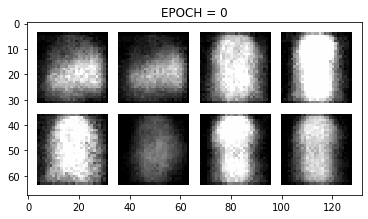

In [24]:
show_frame_rec(0)

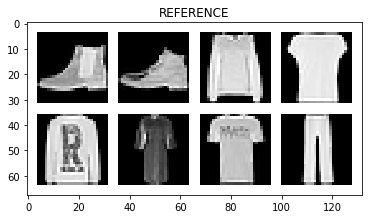

In [25]:
show_batch(reference_imgs[:8],n_col=4,n_padding=4,title="REFERENCE")